Sur la base d'expressions génique d'un panel de 141 gènes fréquemment mutés dans l'AML, faire une classification supervisée avec la classe ELN2017 = Favorable ou Adverse.

# Importation et pré-traitements des données

In [6]:
import pandas as pd

In [7]:
PanelGenes_file = "Panel140Genes.txt"
Expression_file = "BEATAMLdata/BEATAML_NormalizedExpression.tsv"
BeatAML_file = "BEATAMLdata/BEATAML_Cliniques.csv"

In [8]:
PanelGenes = []

with open(PanelGenes_file, "r") as f:
    for line in f:
        PanelGenes.append(line.strip())

print(PanelGenes)
print(len(PanelGenes))

['ABL1', 'ADA', 'ANKRD26', 'ASXL1', 'ASXL2', 'ATM', 'ATRX', 'BCL6', 'BCOR', 'BCORL1', 'BCR', 'BIRC3', 'BLM', 'BRAF', 'BRCA1', 'BRCA2', 'C17orf97', 'CALR', 'CARD11', 'CBL', 'CBLB', 'CBLC', 'CDKN2A', 'CEBPA', 'CHEK2', 'CREBBP', 'CRLF2', 'CSF1R', 'CSF3R', 'CTCF', 'CUX1', 'DAXX', 'DDX41', 'DNM2', 'DNMT1', 'DNMT3A', 'EED', 'EGFR', 'ELANE', 'EP300', 'ETNK1', 'ETV6', 'EZH2', 'FAM154B', 'FAM47A', 'FAM5C', 'FAS', 'FBXW7', 'FLRT2', 'FLT3', 'GATA1', 'GATA2', 'GJB3', 'GNAS', 'HNRNPK', 'HRAS', 'IDH1', 'IDH2', 'IKZF1', 'IKZF3', 'IL7R', 'JAK1', 'JAK2', 'JAK3', 'KAT6A', 'KCNA4', 'KCNK13', 'KDM6A', 'KDR', 'KIT', 'KLHDC8B', 'KLHL6', 'KMT2A', 'KMT2C', 'KRAS', 'LRRC4', 'LUC7L2', 'MAP2K1', 'MLH1', 'MPL', 'MSH2', 'MSH6', 'MYC', 'MYD88', 'NBN', 'NF1', 'NOTCH1', 'NPAT', 'NPM1', 'NRAS', 'NSD1', 'NTRK3', 'OR13H1', 'OR8B12', 'P2RY2', 'PAX5', 'PCDHB1', 'PDGFRA', 'PHF6', 'PML', 'PMS2', 'PRAMEF2', 'PRF1', 'PRPF40B', 'PRPF8', 'PTEN', 'PTPN11', 'RAD21', 'RB1', 'RELN', 'RUNX1', 'SETBP1', 'SF1', 'SF3A1', 'SF3B1', 'SH2B

In [9]:
GenesInBEATAML = []

with open(Expression_file, "r") as f:
    for line in f:
        geneName = line.split("\t")[1]
        GenesInBEATAML.append(geneName)

GenesInBEATAML = GenesInBEATAML[1:] #on enlève le header
print(GenesInBEATAML)
print(len(GenesInBEATAML))

['TSPAN6', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2', 'GCLC', 'NFYA', 'STPG1', 'NIPAL3', 'LAS1L', 'ENPP4', 'SEMA3F', 'ANKIB1', 'CYP51A1', 'KRIT1', 'RAD52', 'BAD', 'LAP3', 'CD99', 'HS3ST1', 'AOC1', 'MAD1L1', 'LASP1', 'SNX11', 'TMEM176A', 'M6PR', 'KLHL13', 'ICA1', 'DBNDD1', 'ALS2', 'CASP10', 'CFLAR', 'TFPI', 'NDUFAF7', 'RBM5', 'MTMR7', 'SLC7A2', 'ARF5', 'SARM1', 'POLDIP2', 'PLXND1', 'AK2', 'CD38', 'FKBP4', 'KDM1A', 'RBM6', 'CAMKK1', 'RECQL', 'CCDC132', 'HSPB6', 'ARHGAP33', 'NDUFAB1', 'PDK4', 'SLC22A16', 'ZMYND10', 'SLC25A13', 'ST7', 'CDC27', 'SLC4A1', 'HCCS', 'DVL2', 'UPF1', 'SKAP2', 'SLC25A5', 'CCDC109B', 'HOXA11', 'POLR2J', 'DHX33', 'MEOX1', 'THSD7A', 'LIG3', 'RPAP3', 'ACSM3', 'AC004381.6', 'CIAPIN1', 'SPPL2B', 'FAM214B', 'COPZ2', 'PRKAR2B', 'MSL3', 'CREBBP', 'BZRAP1', 'MPO', 'GCFC2', 'WDR54', 'CROT', 'ABCB4', 'KMT2E', 'RHBDD2', 'SOX8', 'IBTK', 'ZNF195', 'MYCBP2', 'FBXL3', 'ITGAL', 'PDK2', 'ITGA3', 'ZFX', 'LAMP2', 'GGNBP2', 'ITGA2B', 'GDE1', 'C19orf60', 'OSBPL7', 'TMEM98', 'YB

In [10]:
PatientsAndPronostic_df = pd.read_csv(BeatAML_file, comment="#")
PatientsAndPronostic_df = PatientsAndPronostic_df[["dbgap_subject_id", "dbgap_dnaseq_sample", "dbgap_rnaseq_sample", "ELN2017"]]
PatientsAndPronostic_df

,dbgap_subject_id,dbgap_dnaseq_sample,dbgap_rnaseq_sample,ELN2017
0,2476,BA2102D,NaN,Intermediate
1,2476,BA2005D,NaN,NonInitial
2,2476,BA3074D,NaN,NonInitial
3,2476,BA2555D,NaN,NonInitial
4,2476,NaN,BA3073R,NonInitial
...,...,...,...,...
937,2791,BA3129D,NaN,NonInitial
938,2800,BA3284D,NaN,Favorable
939,2722,BA3111D,NaN,MissingKaryo
940,2687,BA3209D,NaN,NonInitial


In [11]:
ValeursAGarder = ["Favorable", "Adverse"]
PatientsAndPronostic_df = PatientsAndPronostic_df[PatientsAndPronostic_df["ELN2017"].isin(ValeursAGarder)]
PatientsAndPronostic_df

,dbgap_subject_id,dbgap_dnaseq_sample,dbgap_rnaseq_sample,ELN2017
13,2551,BA2643D,NaN,Adverse
35,2059,BA2831D,NaN,Adverse
40,2007,BA2918D,NaN,Favorable
43,2271,NaN,BA2865R,Favorable
46,2518,NaN,BA2751R,Adverse
...,...,...,...,...
931,2594,BA3385D,BA3385R,Favorable
934,2611,BA3123D,BA3123R,Adverse
935,2712,BA3088D,NaN,Favorable
938,2800,BA3284D,NaN,Favorable


# Avoir les biosamples et l'ELN2017

In [12]:
ind_beatAML = []

for _, sample in PatientsAndPronostic_df.iterrows():
    if pd.isna(sample["dbgap_dnaseq_sample"]): #and pd.isna(sample["dbgap_rnaseq_sample"]):
        sample_id = sample["dbgap_rnaseq_sample"][:6]
    else:
        sample_id = sample["dbgap_dnaseq_sample"][:6]
    ind_beatAML.append(sample_id)

print(ind_beatAML)
print(len(ind_beatAML))

['BA2643', 'BA2831', 'BA2918', 'BA2865', 'BA2751', 'BA2055', 'BA2488', 'BA2712', 'BA3354', 'BA3288', 'BA3387', 'BA3159', 'BA2068', 'BA2104', 'BA3259', 'BA2449', 'BA2235', 'BA3038', 'BA2667', 'BA2239', 'BA2782', 'BA2649', 'BA2257', 'BA2598', 'BA2134', 'BA2337', 'BA2909', 'BA2653', 'BA2947', 'BA2162', 'BA2564', 'BA2597', 'BA3243', 'BA2525', 'BA2357', 'BA2546', 'BA2742', 'BA2316', 'BA2225', 'BA2148', 'BA3093', 'BA2072', 'BA2733', 'BA2193', 'BA2995', 'BA2681', 'BA2191', 'BA2832', 'BA2996', 'BA2600', 'BA2894', 'BA3230', 'BA2779', 'BA2731', 'BA2294', 'BA2816', 'BA2631', 'BA2023', 'BA2375', 'BA2455', 'BA2636', 'BA2325', 'BA2156', 'BA2511', 'BA2834', 'BA2505', 'BA2871', 'BA2125', 'BA2603', 'BA2808', 'BA2482', 'BA2594', 'BA2332', 'BA2906', 'BA2956', 'BA2474', 'BA2737', 'BA2006', 'BA2936', 'BA2438', 'BA2199', 'BA2915', 'BA2992', 'BA2220', 'BA2759', 'BA2982', 'BA2772', 'BA2960', 'BA2935', 'BA2260', 'BA2948', 'BA2161', 'BA2524', 'BA2811', 'BA2358', 'BA2619', 'BA3013', 'BA2278', 'BA2405', 'BA2856',

In [13]:
PatientsAndPronostic_df = pd.DataFrame({'SampleID': ind_beatAML, 'ELN2017': PatientsAndPronostic_df["ELN2017"]})
PatientsAndPronostic_df

,SampleID,ELN2017
13,BA2643,Adverse
35,BA2831,Adverse
40,BA2918,Favorable
43,BA2865,Favorable
46,BA2751,Adverse
...,...,...
931,BA3385,Favorable
934,BA3123,Adverse
935,BA3088,Favorable
938,BA3284,Favorable


# Vérification de la présence de ces gènes dans les données BEAT AML

In [14]:
GenesToDel = [] 

for gene in PanelGenes:
    if gene not in GenesInBEATAML: #si les gènes ne sont pas présents dans BEATAML (expressions)
        GenesToDel.append(gene)

print(GenesToDel)
print(len(GenesToDel))

['CBLC', 'FAM47A', 'FAM5C', 'GJB3', 'KCNA4', 'LUC7L2', 'OR13H1', 'OR8B12', 'PCDHB1', 'PRAMEF2', 'TUBA3C']
11


In [15]:
#Suppression des gènes non présents dans BEATAML
for gene in GenesToDel:
    PanelGenes.remove(gene)

print(PanelGenes)
print(len(PanelGenes))

['ABL1', 'ADA', 'ANKRD26', 'ASXL1', 'ASXL2', 'ATM', 'ATRX', 'BCL6', 'BCOR', 'BCORL1', 'BCR', 'BIRC3', 'BLM', 'BRAF', 'BRCA1', 'BRCA2', 'C17orf97', 'CALR', 'CARD11', 'CBL', 'CBLB', 'CDKN2A', 'CEBPA', 'CHEK2', 'CREBBP', 'CRLF2', 'CSF1R', 'CSF3R', 'CTCF', 'CUX1', 'DAXX', 'DDX41', 'DNM2', 'DNMT1', 'DNMT3A', 'EED', 'EGFR', 'ELANE', 'EP300', 'ETNK1', 'ETV6', 'EZH2', 'FAM154B', 'FAS', 'FBXW7', 'FLRT2', 'FLT3', 'GATA1', 'GATA2', 'GNAS', 'HNRNPK', 'HRAS', 'IDH1', 'IDH2', 'IKZF1', 'IKZF3', 'IL7R', 'JAK1', 'JAK2', 'JAK3', 'KAT6A', 'KCNK13', 'KDM6A', 'KDR', 'KIT', 'KLHDC8B', 'KLHL6', 'KMT2A', 'KMT2C', 'KRAS', 'LRRC4', 'MAP2K1', 'MLH1', 'MPL', 'MSH2', 'MSH6', 'MYC', 'MYD88', 'NBN', 'NF1', 'NOTCH1', 'NPAT', 'NPM1', 'NRAS', 'NSD1', 'NTRK3', 'P2RY2', 'PAX5', 'PDGFRA', 'PHF6', 'PML', 'PMS2', 'PRF1', 'PRPF40B', 'PRPF8', 'PTEN', 'PTPN11', 'RAD21', 'RB1', 'RELN', 'RUNX1', 'SETBP1', 'SF1', 'SF3A1', 'SF3B1', 'SH2B3', 'SH2D1A', 'SMARCB1', 'SMC1A', 'SMC3', 'SRP72', 'SRSF2', 'STAG2', 'STAT3', 'STXBP2', 'SUZ12'

# Récupérer les données des patients (expressions de ces gènes + ELN2017)

In [16]:
with open(Expression_file, 'r') as f:
    for line in f.readlines():
        break

Samples = line.split("\t")[4:]
Samples = [ech[:6] for ech in Samples] #liste des échantillons

In [17]:
SamplesToInclude = []

for ind in Samples:
    if ind in ind_beatAML:
        SamplesToInclude.append(ind)

print(len(Samples))
print(len(ind_beatAML))
print(len(SamplesToInclude)) #333 échantillons à la fois présents dans les données d'expressions et les données cliniques

707
427
333


In [34]:
# AVEC LES 141 GENES

ExpressionsTable = pd.DataFrame(columns=PanelGenes, index=Samples)

with open(Expression_file, 'r') as f:
    for line in f.readlines():
        geneName = line.split("\t")[1]
        if geneName in PanelGenes:
            expressions = line.split("\t")[4:]
            expressions = [float(ech) for ech in expressions]
            ExpressionsTable[geneName] = expressions

In [36]:
# A COMMENTER SI ON NE VEUT QUE LES 141 GENES

ExpressionsTable = pd.DataFrame(columns=GenesInBEATAML, index=Samples)

with open(Expression_file, 'r') as f:
    for line in f.readlines():
        geneName = line.split("\t")[1]
        if geneName in GenesInBEATAML:
            expressions = line.split("\t")[4:]
            expressions = [float(ech) for ech in expressions]
            ExpressionsTable[geneName] = expressions

In [37]:
ExpressionsTable = ExpressionsTable.loc[SamplesToInclude]
ExpressionsTable['ELN2017'] = PatientsAndPronostic_df.set_index('SampleID').loc[ExpressionsTable.index, 'ELN2017']
ExpressionsTable

/tmp/ipykernel_4684/3421957745.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ExpressionsTable['ELN2017'] = PatientsAndPronostic_df.set_index('SampleID').loc[ExpressionsTable.index, 'ELN2017']


,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4,ELN2017
BA2865,-3.270986,6.613288,4.527671,2.984807,7.274627,0.786148,6.505982,5.155284,6.551802,2.043420,...,1.015299,0.565468,3.106610,-0.810850,1.581326,-0.206872,2.879839,0.846900,3.126568,Favorable
BA2751,-3.286357,7.019176,4.513619,3.480357,8.761782,0.572116,5.733238,4.795577,6.155240,1.618918,...,0.611383,1.099057,3.390543,0.691350,-1.674034,0.798084,3.564226,1.457473,2.627466,Adverse
BA2712,-2.831293,7.344593,4.221367,3.106063,9.624616,1.370677,7.279829,4.747444,5.560744,3.205066,...,3.102195,0.974204,2.937686,2.174860,-0.592151,0.393859,2.957714,0.429556,0.253941,Adverse
BA2068,-3.785178,7.263234,3.548906,4.263616,4.158187,0.341832,6.201863,5.151740,6.777759,1.138474,...,0.709868,-0.191249,4.176012,-0.863064,0.894675,-2.376456,3.299070,-1.772851,1.100327,Favorable
BA2104,-3.286357,6.733454,3.860751,3.216410,10.558126,4.055997,6.872750,4.902195,5.828595,2.014239,...,2.583769,2.467552,3.725606,2.783233,1.605256,0.340081,2.431361,0.939179,1.959385,Favorable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA3146,-1.580224,6.893799,3.622811,2.671935,9.230892,3.160988,6.486061,5.276535,6.346913,1.579362,...,0.292171,0.588527,2.803636,0.306805,0.974204,0.189592,2.849817,-0.766871,2.676941,Favorable
BA3211,-2.376456,6.132085,3.753946,3.322450,6.818111,0.838046,5.869775,5.168906,6.252653,1.420184,...,0.614695,-1.064561,3.190371,-3.237867,2.927858,-0.880517,5.254587,0.890279,2.127914,Adverse
BA3137,-3.152332,6.977313,3.569042,3.252578,9.230892,-2.875997,6.807281,4.706622,6.358559,0.966846,...,2.279702,0.106733,2.694741,-0.955020,2.257645,-0.891707,3.353377,-0.558699,2.336740,Favorable
BA3385,-1.942942,6.973836,4.107911,3.495484,9.645280,-0.261236,6.138977,5.085832,6.320369,1.896358,...,1.565298,0.197851,2.913005,-0.006757,0.174179,0.277265,3.378446,0.459550,3.110494,Favorable


Vérifier que le tableau est correct avec quelques tests

In [38]:
df_expr = pd.read_csv(Expression_file, sep="\t") #importation de tout le tableau

gene = "C1orf112"
samp = "BA3211"
samp = samp + "R"
df_expr.loc[df_expr['display_label'] == gene, samp].values[0]

np.float64(3.32244963878786)

# Classification

## Visualisation par une ACP

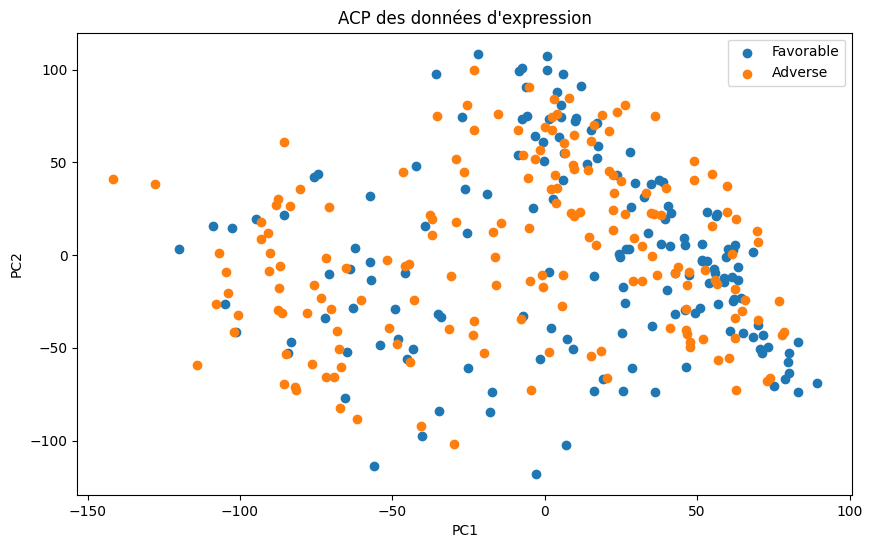

Variance expliquée par PC1: 12.02%
Variance expliquée par PC2: 10.12%


In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = ExpressionsTable.drop(columns=['ELN2017'])
y = ExpressionsTable['ELN2017']

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) #Centrer et réduire 

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['ELN2017'] = y.values

#Visualiser les résultats de l'ACP
plt.figure(figsize=(10, 6))
for label in pca_df['ELN2017'].unique():
    plt.scatter(pca_df.loc[pca_df['ELN2017'] == label, 'PC1'],
                pca_df.loc[pca_df['ELN2017'] == label, 'PC2'],
                label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP des données d\'expression')
plt.legend()
plt.show()


explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par PC1: {100*explained_variance[0]:.2f}%")
print(f"Variance expliquée par PC2: {100*explained_variance[1]:.2f}%")

## LASSO

Least Absolute Shrinkage and Selection Operator : Méthode de régression linéaire qui utilise une pénalisation L1 (évite l'over-fitting et ainsi améliore la généralisation) pour contraindre les coefs des features. 

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score


X = ExpressionsTable.drop(columns=['ELN2017'])
y = ExpressionsTable['ELN2017']

y = pd.get_dummies(y, drop_first=True) #Convertir les étiquettes de classe en valeurs numériques


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=0) #Train avec Cross Validation
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_class) #Perf du modèle
precision = precision_score(y_test, y_pred_class)

print("Performances du modèle LASSO:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

coefficients = lasso.coef_ #Obtenir les coefficients du modèle = importance de chaque feature (ici gènes) dans la prédiction

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

#Afficher les features les plus importantes
print("Features les plus importantes selon le modèle LASSO:")
print(coef_df.head(10))
genes_imp_lasso = coef_df.head(10)['Feature'].values

/home/thomas.louvet/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performances du modèle LASSO:
Accuracy: 0.9402985074626866
Precision: 0.9333333333333333
Features les plus importantes selon le modèle LASSO:
      Feature  Coefficient
5480    ADRM1     0.071471
9577    NDST3     0.040357
7503    PDGFC     0.038058
91       SOX8     0.036776
5381    PHF10    -0.035155
11519     ABO    -0.034061
7942    HMGA2    -0.031402
7264   DUSP10     0.027750
13346   WNT7B     0.027722
6498   POU2F3    -0.026559


## XGBoost

Extreme Gradient Boosting = combine plusieurs modèles faibles (arbres de décision typiquement)

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt


X = ExpressionsTable.drop(columns=['ELN2017'])
y = ExpressionsTable['ELN2017']

y = pd.get_dummies(y, drop_first=True) #Convertir les étiquettes de classe en valeurs numériques

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss') #Train du modèle
xgb.fit(X_train_scaled, y_train)


y_pred = xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Performances du modèle XGBoost:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

# Obtenir les importances des features
importances = xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print("Features les plus importantes selon le modèle XGBoost:")
print(importance_df.head(10))
genes_imp_xgb = importance_df.head(10)['Feature'].values

/home/thomas.louvet/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performances du modèle XGBoost:
Accuracy: 0.9402985074626866
Precision: 0.9333333333333333
Features les plus importantes selon le modèle XGBoost:
             Feature  Importance
7942           HMGA2    0.120730
21690   RP11-527L4.5    0.063578
5985           KCTD1    0.061409
12716           TBX1    0.050911
8758         SLC45A3    0.043739
6044        ARHGAP32    0.039297
13468          BEND4    0.035409
22381   RP11-762E8.1    0.030770
18039  RP11-383H13.1    0.026757
11030          MLLT3    0.026441


Meilleures performances si on utilise **TOUTES** les données d'expression de gène et non que le panel de gènes.

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz


X = ExpressionsTable.drop(columns=['ELN2017'])
y = ExpressionsTable['ELN2017']

y = pd.get_dummies(y, drop_first=True) # Convertir les étiquettes de classe en valeurs numériques

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeClassifier(random_state=0) #Train du modèle DT
tree.fit(X_train_scaled, y_train)


# Exporter l'arbre de décision dans un format compatible avec graphviz
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Class 0', 'Class 1'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Utiliser graphviz pour visualiser l'arbre de décision
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Sauvegarder l'arbre de décision dans un fichier
graph.view()  # Afficher l'arbre de décision


y_pred = tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Performances du modèle d'arbre de décision:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


importances = tree.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Features les plus importantes selon le modèle d'arbre de décision:")
print(importance_df.head(10))
genes_imp_tree = importance_df.head(10)['Feature'].values

Performances du modèle d'arbre de décision:
Accuracy: 0.8059701492537313
Precision: 0.8148148148148148
Features les plus importantes selon le modèle d'arbre de décision:
             Feature  Importance
7942           HMGA2    0.402180
21690   RP11-527L4.5    0.211178
3557         KHDRBS2    0.097507
1735            ESR1    0.072282
8992           RUSC1    0.055012
5346             NRL    0.046164
17030        EEF1DP3    0.032856
16706     AP000282.2    0.028892
20956  RP11-278A23.2    0.014902
14325         ARMCX6    0.014431


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/thomas.louvet/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [43]:
for gene in genes_imp_lasso:
    if gene in genes_imp_xgb and gene in genes_imp_tree:
        print(gene)

HMGA2



(process:53556): Gtk-WARNING **: 16:04:12.178: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/thomas.louvet/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/thomas.louvet/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:53556): Gtk-WARNING **: 16:04:12.248: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/183/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 16:04:12.248: Failed to load module "canberra-gtk-module"
Gtk-Message: 16:04:12.251: Failed to load module "canberra-gtk-module"


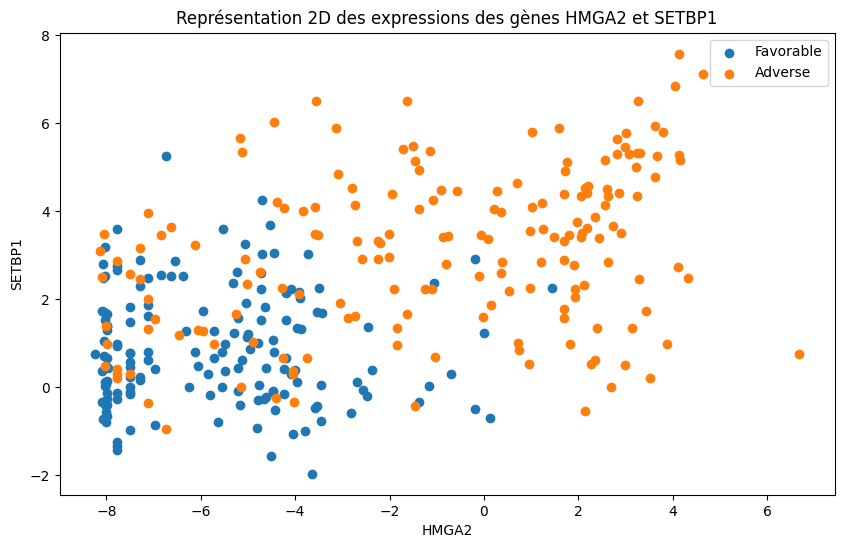

/home/thomas.louvet/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object file: Permission denied
Failed to load module: /home/thomas.louvet/snap/code/common/.cache/gio-modules/libdconfsettings.so

(evince:53556): Gtk-WARNING **: 16:04:12.494: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_expression_2d(gene1, gene2, ExpressionsTable=ExpressionsTable):
    X = ExpressionsTable[[gene1, gene2]]
    y = ExpressionsTable['ELN2017']

    # Créer un DataFrame avec les colonnes SETBP1 et ASXL2 et les étiquettes de classe
    plot_df = pd.DataFrame({
        gene1: X[gene1],
        gene2: X[gene2],
        'ELN2017': y
    })

    # Visualiser les données
    plt.figure(figsize=(10, 6))
    for label in plot_df['ELN2017'].unique():
        plt.scatter(plot_df.loc[plot_df['ELN2017'] == label, gene1],
                    plot_df.loc[plot_df['ELN2017'] == label, gene2],
                    label=label)
    plt.xlabel(gene1)
    plt.ylabel(gene2)
    plt.title(f'Représentation 2D des expressions des gènes {gene1} et {gene2}')
    plt.legend()
    plt.show()


plot_expression_2d('HMGA2', 'SETBP1')

In [ ]:
# Voir idées papier